<a href="https://colab.research.google.com/github/head1ton/kaggle_dev/blob/master/A_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading libraray

In [704]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir('./'))

['.config', 'train.csv', 'test.csv', 'sample_data']


Loading Datasets

In [0]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [0]:
# import pandas_profiling
# train.profile_report()

In [0]:
# test.profile_report()

In [708]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,NaN,1,0,19996,52.0000,C126,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S


In [709]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
383,1275,3,"McNamee, Mrs. Neal (Eileen O'Leary)",female,19.0,1,0,376566,16.100,NaN,S
91,983,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.775,NaN,S
180,1072,2,"McCrie, Mr. James Matthew",male,30.0,0,0,233478,13.000,NaN,S
378,1270,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S
385,1277,2,"Herman, Miss. Kate",female,24.0,1,2,220845,65.000,NaN,S


In [710]:
train.shape

(891, 12)

In [711]:
test.shape

(418, 11)

In [712]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [713]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [714]:
%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'>
    <noscript>
        <a href='#'><img alt='An Overview of Titanic Training Dataset ' 
            src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' 
            style='border: none' /></a>
    </noscript>
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
        <param name='embed_code_version' value='3' /> 
        <param name='site_root' value='' />
        <param name='name' value='Titanic_data_mining&#47;Dashboard1' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> 
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='filter' value='publish=yes' />
    </object>
</div>                
<script type='text/javascript'>
                    var divElement = document.getElementById('viz1516349898238');
                    var vizElement = divElement.getElementsByTagName('object')[0];                    
                    vizElement.style.width='100%';
                    vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
                    var scriptElement = document.createElement('script');                    
                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>


In [715]:
passengerId = test.PassengerId
print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

In [0]:
# train.drop(['PassengerId'], axis=1, inplace=True)
# test.drop(['PassengerId'], axis=1, inplace=True)

결측치 확인 및 처리

In [717]:
# Fare 값이 하나 없다. 확인해보자
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [718]:
test[test.Pclass == 3]['Fare'].mean()

12.459677880184334

In [719]:
test[test.Pclass == 3].sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
116,1008,3,"Thomas, Mr. John",male,NaN,0,0,2681,6.4375,NaN,C
170,1062,3,"Lithman, Mr. Simon",male,NaN,0,0,S.O./P.P. 251,7.5500,NaN,S
325,1217,3,"Assam, Mr. Ali",male,23.0,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S
249,1141,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",female,NaN,1,0,2660,14.4542,NaN,C
320,1212,3,"Andersson, Mr. Johan Samuel",male,26.0,0,0,347075,7.7750,NaN,S


In [0]:
test.Fare.fillna(12.4596, inplace=True)

In [721]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [723]:
missing_percentage(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [724]:
missing_percentage(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Embarked,0,0.00
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [0]:
def percent_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna=False, normalize=True)*100, 2))
    total = pd.DataFrame(df.loc[:, feature].value_counts(dropna=False))

    total.columns = ["Total"]
    percent.columns = ["Percent"]
    return pd.concat([total, percent], axis=1)

In [726]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [727]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Fare는 80달러로 같고 둘 다 여성이며 Pclass는 1이다.

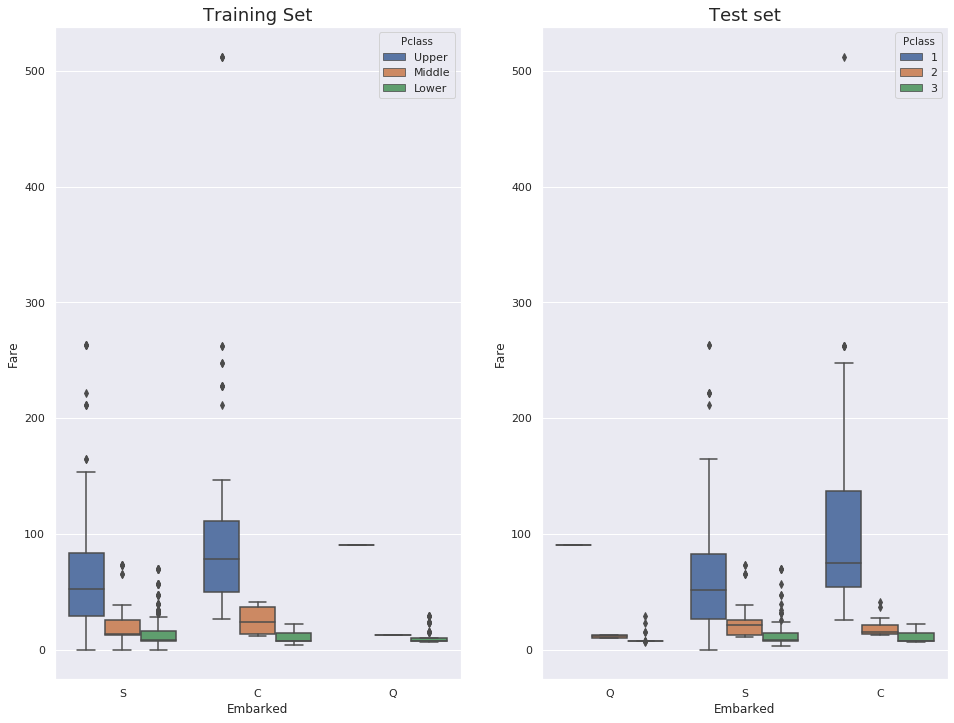

In [728]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16, 12), ncols=2)
ax1 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train, ax=ax[0])
ax2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=test, ax=ax[1])
ax1.set_title("Training Set", fontsize=18)
ax2.set_title("Test set", fontsize=18)

leg_1 = ax1.get_legend()
leg_1.set_title('Pclass')
legs = leg_1.texts
legs[0].set_text('Upper')
legs[1].set_text('Middle')
legs[2].set_text('Lower')

fig.show()

훈련 세트와 테스트 세트를 보면 80달러에 가까이 있는 것은 Embarked='C' 로 보인다. 
그러므로 C값을 넣어준다

In [0]:
train.Embarked.fillna("C", inplace=True)

Cabin Feature 결측치 확인

In [730]:
train.Cabin.isnull().sum() / len(train.Cabin)

0.7710437710437711

In [731]:
test.Cabin.isnull().sum() / len(test.Cabin)

0.7822966507177034

Cabin 의 null값을 N으로 대체

In [0]:
survivers = train.Survived

train.drop(['Survived'], axis=1, inplace=True)

all_data = pd.concat([train, test], ignore_index=False)

all_data.Cabin.fillna("N", inplace=True)

In [733]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [734]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [735]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [736]:
all_data.Cabin

0         N
1       C85
2         N
3      C123
4         N
       ... 
413       N
414    C105
415       N
416       N
417       N
Name: Cabin, Length: 1309, dtype: object

In [0]:
all_data.Cabin = [i[0] for i in all_data.Cabin] # i[0]은 C105에서 첫번째 문자만 가져온다.

In [738]:
all_data.Cabin.value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [739]:
percent_value_counts(all_data, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [740]:
all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.126126
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [741]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")["Fare"].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.126126
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [742]:
with_N.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,N,Q
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,N,S


In [743]:
without_N.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S


In [0]:
def cabin_estimator(i):
    a = 0
    if i < 16:
        a = 'G'
    elif i >= 16 and i < 27:
        a = 'F'
    elif i >= 27 and i < 38:
        a = 'T'
    elif i >= 38 and i < 47:
        a = 'A'
    elif i >= 47 and i < 53:
        a = 'E'
    elif i >= 53 and i < 54:
        a = 'D'
    elif i >= 54 and i < 116:
        a = 'C'
    else:
        a = 'B'
    return a

In [0]:
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

all_data = pd.concat([with_N, without_N], axis=0)

all_data.sort_values(by='PassengerId', inplace=True)

train = all_data[:891]

test = all_data[891:]

train['Survived'] = survivers

In [746]:
all_data.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
182,183,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,T,S
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B,C
507,508,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,F,S
295,1187,3,"Angheloff, Mr. Minko",male,26.0,0,0,349202,7.8958,G,S
535,536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,F,S


In [747]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [748]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [749]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


위의 조건 Pclass=3, Sex='male', Embarked='S' 의 평균값을 확인해서 넣어주자

In [750]:
missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
test.Fare.fillna(missing_value)

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

이제 결측치 Age에 대해 확인하고 처리하자.

In [751]:
str((train.Age.isnull().sum()/len(train))*100) + str('%')

'19.865319865319865%'

In [752]:
str((test.Age.isnull().sum()/len(test))*100) + str('%')

'20.574162679425836%'

Age의 결측치가 20% 정도 된다. Age의 경우 생존률에 변수가 너무 크기에 머신러닝으로 처리해서 넣어주도록 하자. 이 부분은 나중에 처리하기로 한다.

시각화 및 특징 관계에 대해 생각해보자.

* 대충 확인하고 가정해보면
* 남자보다 여자가 많이 살아 남았다.
* 사회적 지위가 높은 사람이 다른 사람들보다 많이 살아 남았다.
* 나이가 젊은 사람들이 많이 살아 남았다.
* 운임이 높은 사람들이 많이 살아 남았다.

Text(0.5, 0, 'Sex')

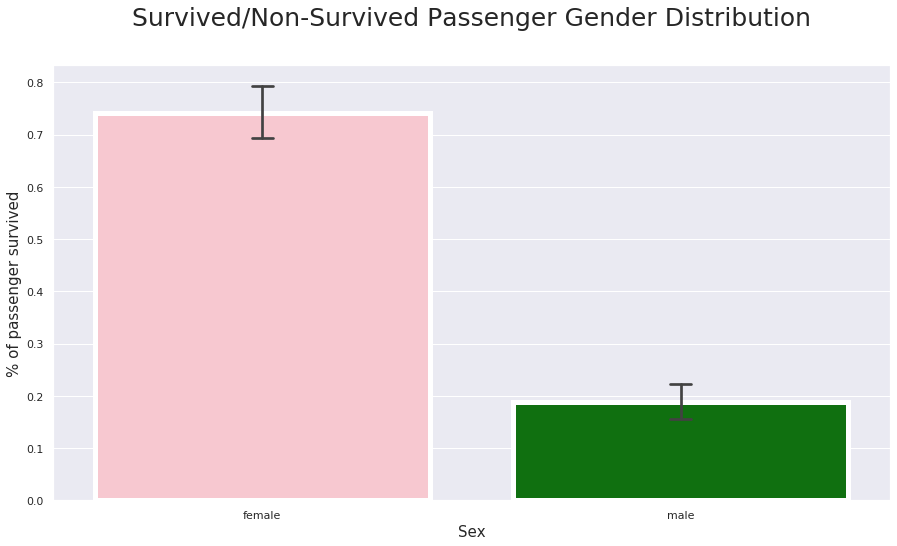

In [753]:
# Gender and Survived
import seaborn as sns
pal = {'male': 'green', 'female': 'pink'}
sns.set(style='darkgrid')
plt.subplots(figsize=(15, 8))
ax = sns.barplot(x = "Sex",
                 y = "Survived",
                 data = train,
                 palette = pal,
                 linewidth = 5,
                 order = ['female', 'male'],
                 capsize = .05)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize=25, loc='center', pad=40)
plt.ylabel("% of passenger survived", fontsize=15,)
plt.xlabel("Sex", fontsize=15)

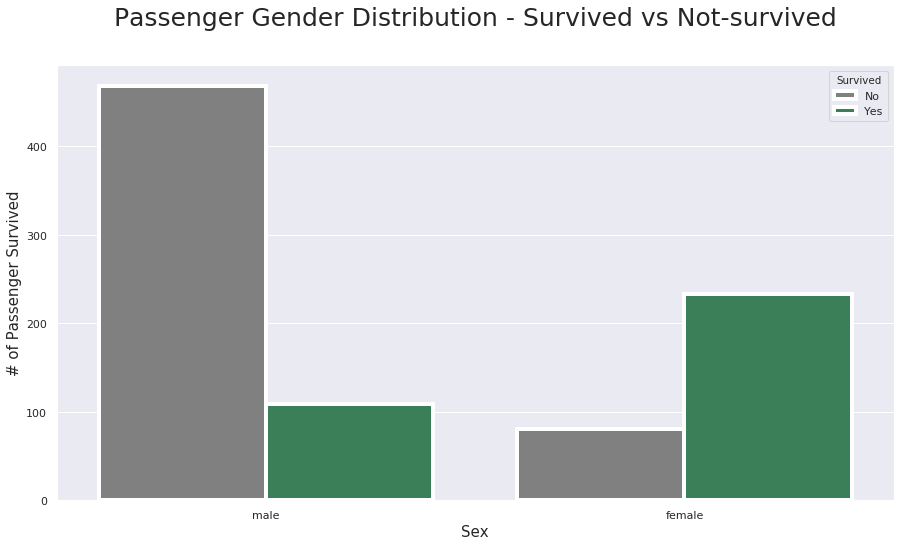

In [754]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize=(15,8))
ax = sns.countplot(x="Sex",
                   hue="Survived",
                   data=train,
                   linewidth=4,
                   palette=pal)

plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize=25, pad=40)
plt.xlabel("Sex", fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize=15)

# labels = ['female', 'male']
# plt.xticks(sorted(train.Sex.unique()), labels)

leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

Pclass and Survived

([<matplotlib.axis.XTick at 0x7f989eeb36d8>,
 <a list of 3 Text xticklabel objects>)

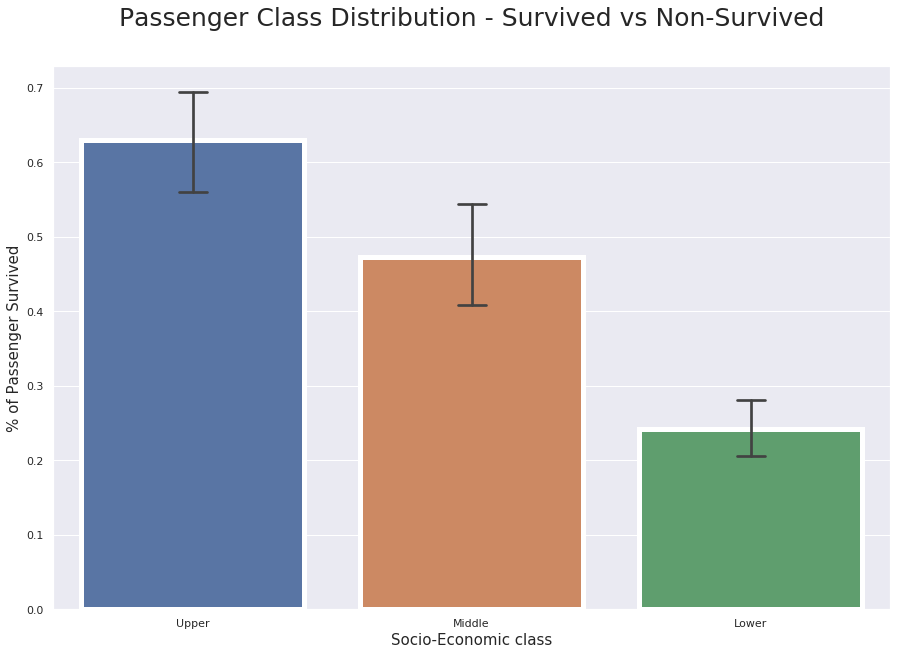

In [755]:
plt.subplots(figsize=(15,10))
sns.barplot(x = "Pclass",
            y="Survived",
            data=train,
            linewidth=5,
            capsize=.1)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize=25, pad=40)
plt.xlabel("Socio-Economic class", fontsize=15)
plt.ylabel("% of Passenger Survived", fontsize=15)
labels = ['Upper', 'Middle', 'Lower']
# val = sorted(train.Pclass.unique())
val = [0, 1, 2]
plt.xticks(val, labels)

([<matplotlib.axis.XTick at 0x7f989cead048>,
 <a list of 3 Text xticklabel objects>)

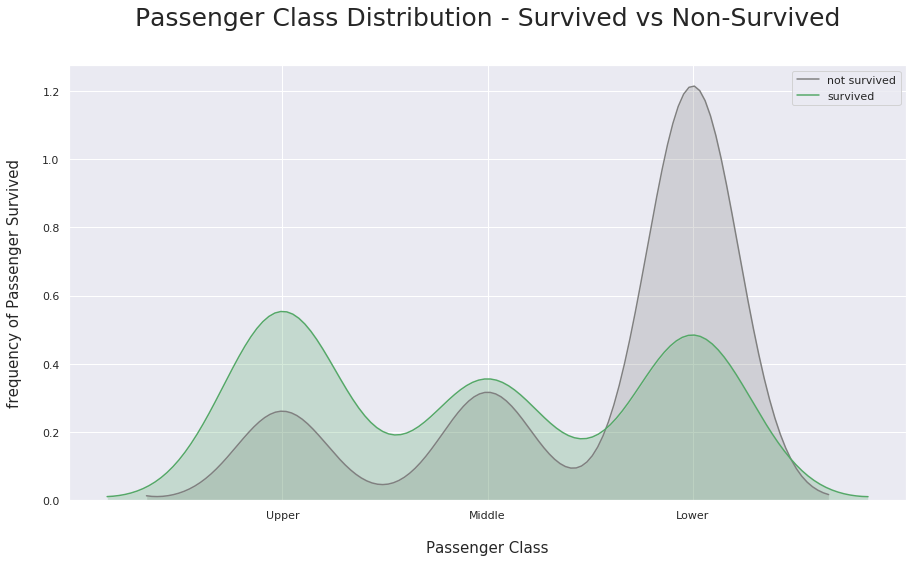

In [756]:
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(train.Pclass[train.Survived == 0],
                 color='gray',
                 shade=True,
                 label='not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Pclass'],
                 color='g',
                 shade=True,
                 label='survived')

plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize=25, pad=40)
plt.ylabel("frequency of Passenger Survived", fontsize=15, labelpad=20)
plt.xlabel("Passenger Class", fontsize=15, labelpad=20)
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels)

Fare and Survived

Text(0.5, 0, 'Fare')

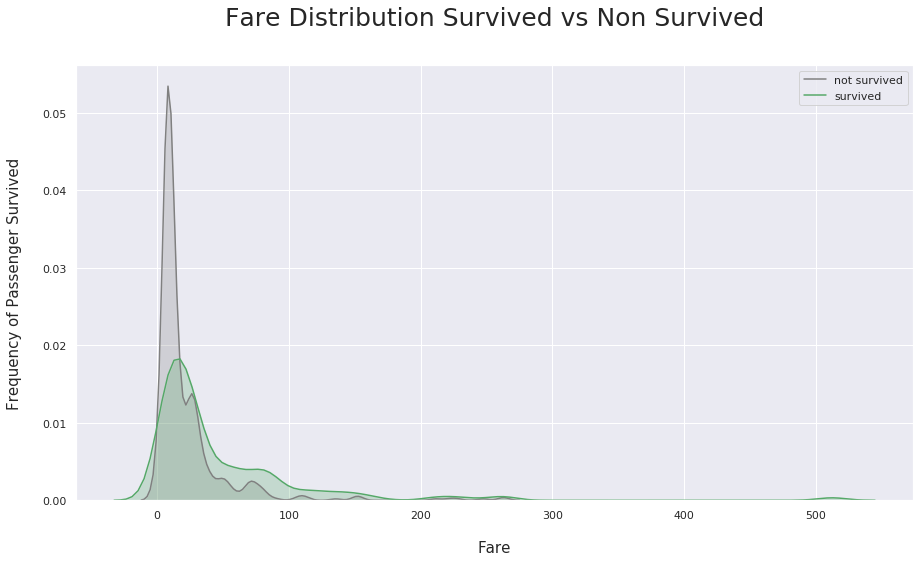

In [757]:
fig = plt.figure(figsize=(15,8))
ax = sns.kdeplot(train.loc[(train['Survived']==0), 'Fare'], color='gray', shade=True, label='not survived')
ax = sns.kdeplot(train.loc[(train['Survived']==1), 'Fare'], color='g', shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize=25, pad=40)
plt.ylabel('Frequency of Passenger Survived', fontsize=15, labelpad=20)
plt.xlabel('Fare', fontsize=15, labelpad=20)

In [758]:
train[train.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


512달러가 3명..outline로 나중에 삭제처리.

Age and Survived

Text(0, 0.5, 'Frequency')

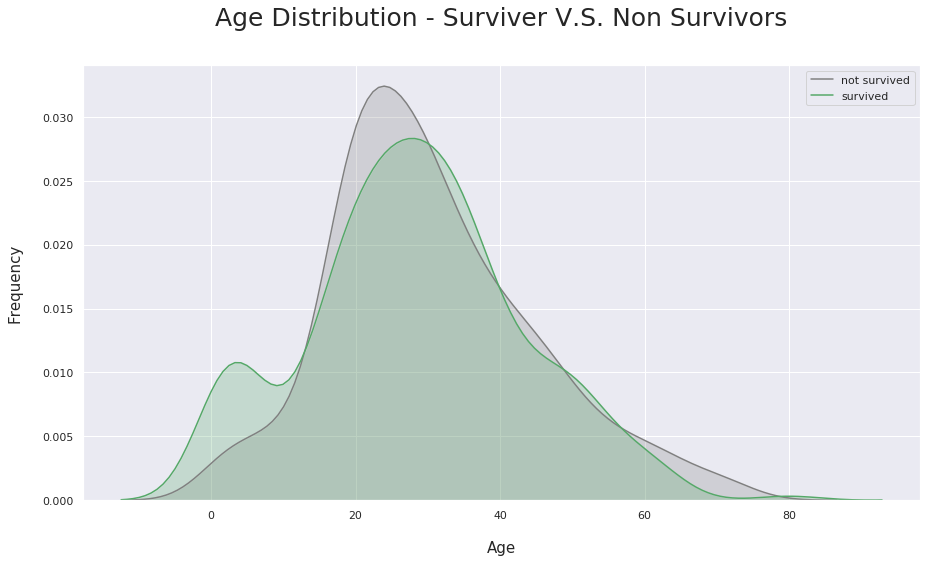

In [759]:
fig = plt.figure(figsize=(15,8))
ax = sns.kdeplot(train.loc[(train['Survived'] == 0), 'Age'], color='gray', shade=True, label='not survived')
ax = sns.kdeplot(train.loc[(train['Survived'] == 1), 'Age'], color='g', shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize=25, pad=40)
plt.xlabel("Age", fontsize=15, labelpad=20)
plt.ylabel("Frequency", fontsize=15, labelpad=20)

Combined Feature Relations

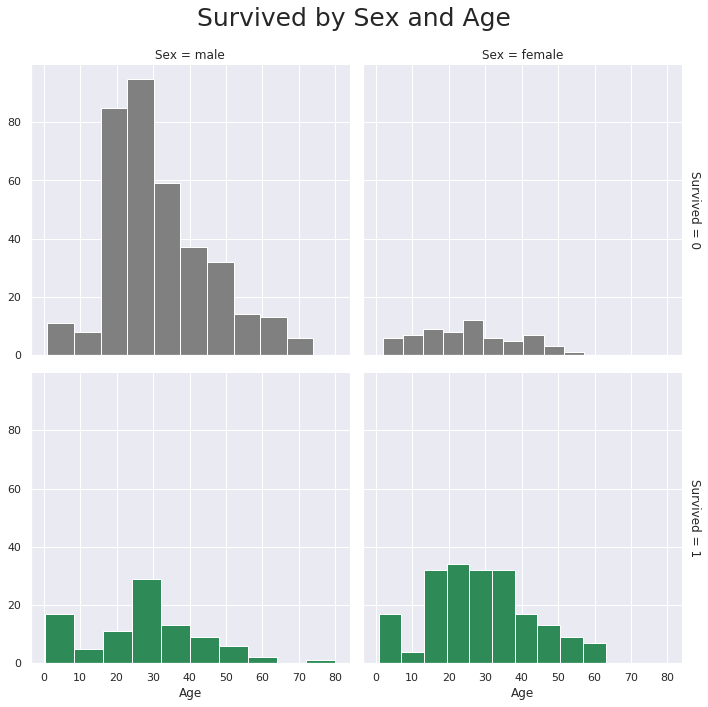

In [760]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train, size=5, col="Sex", row="Survived", margin_titles=True, hue="Survived", palette=pal)
g = g.map(plt.hist, "Age", edgecolor="white")
g.fig.suptitle("Survived by Sex and Age", size=25)
plt.subplots_adjust(top=0.90)

Facetgrid는 여러 변수와 그 관계를 한 번에 시각화하는 좋은 방법임.

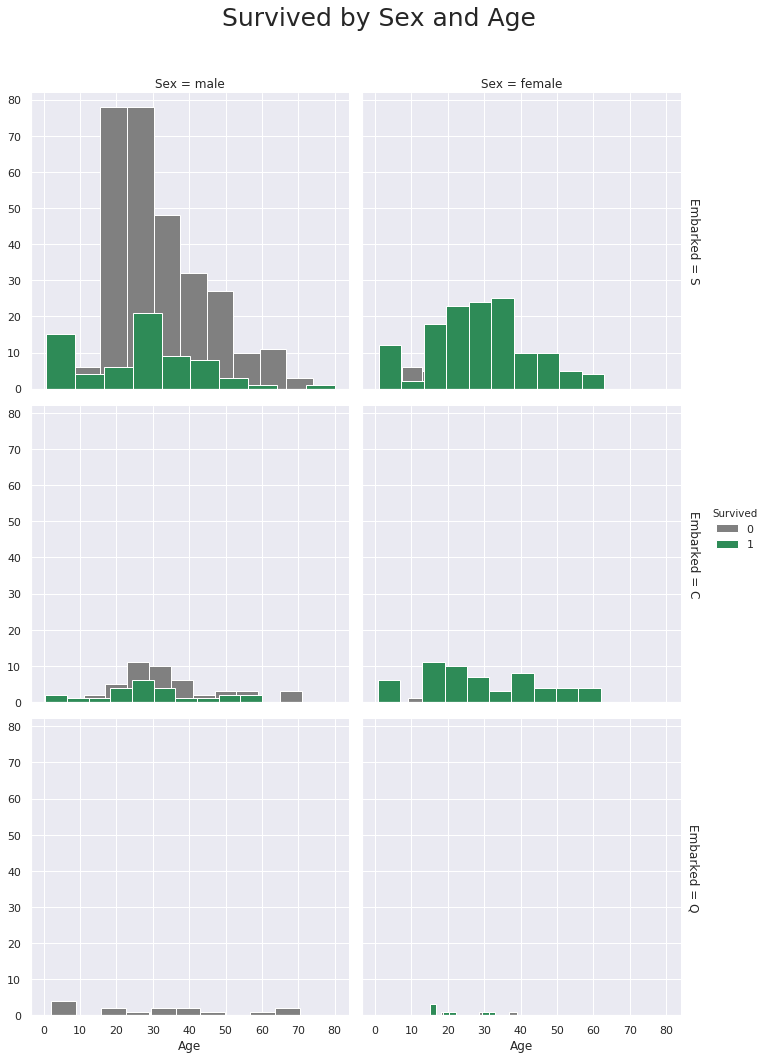

In [761]:
g = sns.FacetGrid(train, size=5, col='Sex', row='Embarked', margin_titles=True, hue="Survived", palette=pal)
g = g.map(plt.hist, "Age", edgecolor="white").add_legend()
g.fig.suptitle("Survived by Sex and Age", size=25)
plt.subplots_adjust(top=0.90)

* 대부분의 승객은 Southampton에서 탑승.
* 승객의 60% 이상이  Southampton에서 탑승
* Queenstown에서 탑승한 남자 승객은 거의가 살아남지 못함
* Queenstown에서 탑승한 여자 승객은 거의 다 살아남음

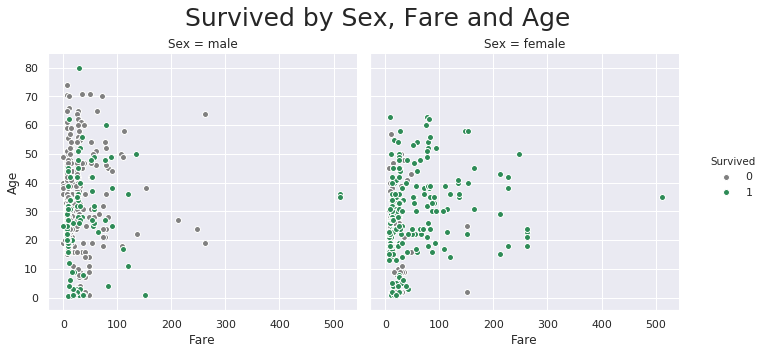

In [762]:
g = sns.FacetGrid(train, size=5, hue='Survived', col='Sex', margin_titles=True, palette=pal)
g.map(plt.scatter, 'Fare', 'Age', edgecolor='w').add_legend()
g.fig.suptitle('Survived by Sex, Fare and Age', size=25)
plt.subplots_adjust(top=0.85)

500달러 이상의 운임인 이상치를 제거하자.

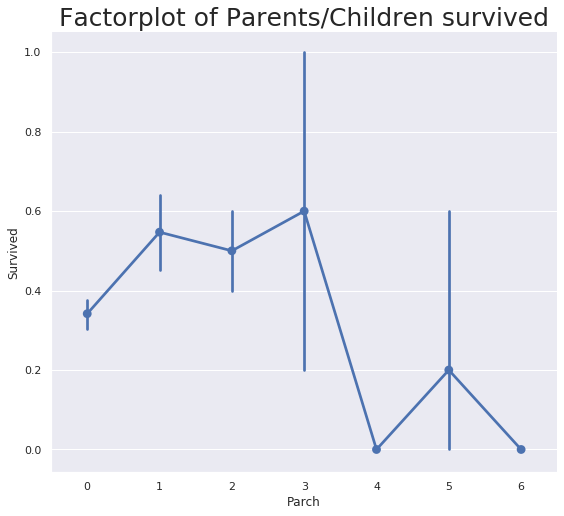

In [763]:
train = train[train.Fare < 500]
sns.factorplot(x="Parch", y="Survived", data=train, kind="point", size=8)
plt.title("Factorplot of Parents/Children survived", fontsize=25)
plt.subplots_adjust(top=0.85)

부모 / 자녀와 함께 그룹으로 여행한 승객은 다른 승객보다 생존율이 낮음

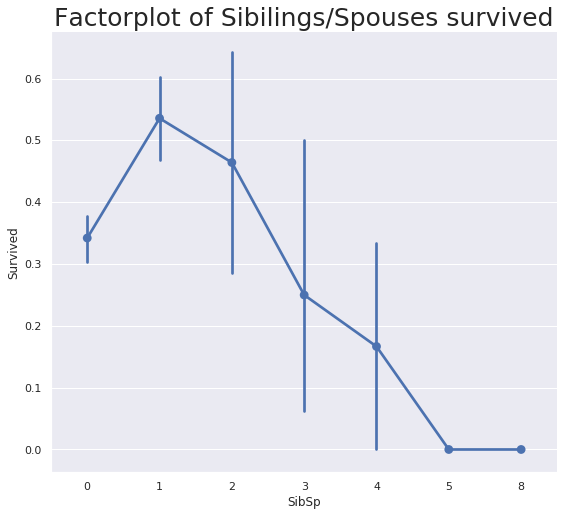

In [764]:
sns.factorplot(x='SibSp', y='Survived', data=train, kind="point", size=8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize=25)
plt.subplots_adjust(top=0.85)

동행 / 배우자와 함께 그룹으로 여행한 승객은 다른 승객보다 생존률이 좋습니다

In [0]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == 'female' else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == 'female' else 1)

통계

In [766]:
train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [767]:
train.describe(include=['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"Petroff, Mr. Nedelio",CA. 2343,G,S
freq,1,7,464,644


In [768]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().reset_index()

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [769]:
survived_summary = train.groupby('Survived')
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [770]:
survived_summary = train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [771]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


Correlation Matrix and Heatmap

In [772]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


Sex 와 Pclass는 생존의 가장 중요한 상관관계 feature.

In [773]:
corr = train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

상관관계 feature의 제곱은 긍정적인 상관관계를 제공하며 관계를 증폭시킴

Text(0.5, 1.03, 'Correlations Among Features')

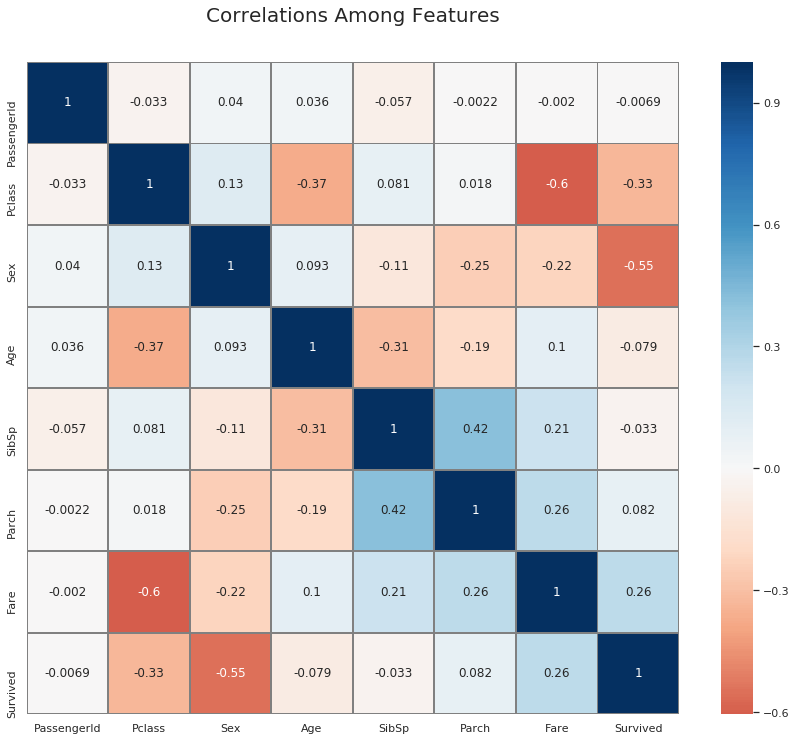

In [774]:
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(),
            annot=True,
            mask=mask,
            cmap='RdBu', # RdBu, RdBu_r
            linewidth=.9,
            linecolor='gray',
            fmt='.2g',
            center=0,
            square=True)
plt.title("Correlations Among Features", y=1.03, fontsize=20, pad=40)

자, 이러한 상관관계를 좀 분석해 봅시다. 우리는 서로 다른 특징들 사이에서 적당히 강한 관계를 발견했다. 페어와 서바이벌 등급 사이에는 분명한 긍정적인 상관관계가 있다. 이 관계는 티켓 값을 더 많이 지불한 승객이 생존할 가능성이 더 높았다는 것을 보여준다. 이 이론은 페어와 P클래스의 상관관계인 다른 하나의 상관관계와 일치한다. 이 관계는 1등석 승객(1)이 2등석 승객(2)보다 더 많은 요금을 지불했다고 말할 수 있다. 이와 유사하게 2등석 승객은 3등석 승객(3)보다 더 많이 지불했다. 이 이론은 또한 우리의 종속 변수인 서바이벌과의 또 다른 P클래스 상관관계를 언급함으로써 뒷받침될 수 있다. P클래스와 서바이벌의 상관관계는 -0.33이다. 이것은 또한 1등 승객이 2등이나 3등보다 생존 가능성이 더 높았다고 말함으로써 설명할 수 있다.

그러나 우리의 종속변수와 가장 중요한 상관관계는 성별 변수인데, 이것은 그 승객이 남성이었는지 여성이었는지에 대한 정보다. 부정할 수 없는 통찰력을 가리키는 -0.54의 크기와의 이러한 부정적인 상관관계. 이 상관관계가 통계적으로 얼마나 중요한지 알아보기 위해 몇 가지 통계를 작성해 봅시다.

상관 관계에 대한 통계 테스트

In [775]:
male_mean = train[train['Sex']==1].Survived.mean()
male_mean

0.18608695652173912

In [776]:
female_mean = train[train['Sex']==0].Survived.mean()
female_mean

0.7412140575079872

In [777]:
str(female_mean - male_mean)

'0.5551271009862481'

In [778]:
import random
np.mean(random.sample(list(train[train['Sex']==1]['Survived']), 50))

0.18

In [779]:
# 무작위 남여 50명 추출
import random
male = train[train['Sex'] == 1]
female = train[train['Sex'] == 0]

m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']), 50)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']), 50)))

print(f"Male mean sample mean: {round(np.mean(m_mean_samples), 2)}")
print("Female mean sample mean: {}".format(round(np.mean(f_mean_samples), 2)))
print(f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples), 2)}")

Male mean sample mean: 0.17
Female mean sample mean: 0.74
Difference between male and female mean sample mean: 0.57


name_length

In [0]:
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <= 20):
        a = 'short'
    elif (size <= 35):
        a = 'medium'
    elif (size <= 45):
        a = 'good'
    else:
        a = 'long'
    return a

train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

# group_names = ['hort', 'medium', 'good', 'long']
# train['name_len_group'] = pd.cut(train['name_length'], bins=4, labels=group_names)

In [781]:
train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,name_length,nLength_group
605,606,3,"Lindell, Mr. Edvard Bengtsson",1,36.0,1,0,349910,15.5500,G,S,0,29,medium
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,1,44,good
562,563,2,"Norman, Mr. Robert Douglas",1,28.0,0,0,218629,13.5000,G,S,0,26,medium
584,585,3,"Paulner, Mr. Uscher",1,NaN,0,0,3411,8.7125,G,C,0,19,short
312,313,2,"Lahtinen, Mrs. William (Anna Sylfven)",0,26.0,1,1,250651,26.0000,F,S,0,37,good


In [0]:
train['title'] = [i.split('.')[0] for i in train.Name]
train['title'] = [i.split(',')[1] for i in train.title]
test['title'] = [i.split('.')[0] for i in test.Name]
test['title'] = [i.split(',')[1] for i in test.title]

In [0]:
# rare_title = ['the Countess', 'Capt', 'Lady', 'Sir', 'Jonkheer', 'Don', 'Major', 'Col']
# train.Name = ['rare' for i in train.Name for j in rare_title if i = j]

train['title'] = [i.replace('Ms', 'Miss') for i in train.title]
train['title'] = [i.replace('Mlle', 'Miss') for i in train.title]
train['title'] = [i.replace('Mme', 'Mrs') for i in train.title]
train['title'] = [i.replace('Dr', 'rare') for i in train.title]
train['title'] = [i.replace('Col', 'rare') for i in train.title]
train['title'] = [i.replace('Major', 'rare') for i in train.title]
train['title'] = [i.replace('Don', 'rare') for i in train.title]
train['title'] = [i.replace('Jonkheer', 'rare') for i in train.title]
train['title'] = [i.replace('Sir', 'rare') for i in train.title]
train['title'] = [i.replace('Lady', 'rare') for i in train.title]
train['title'] = [i.replace('Capt', 'rare') for i in train.title]
train['title'] = [i.replace('the Countess', 'rare') for i in train.title]
train['title'] = [i.replace('Rev', 'rare') for i in train.title]

# rare_title = ['the Countess', 'Capt', 'Lady', 'Sir', 'Jonkheer', 'Don', 'Major', 'Col']
# test.Name = ['rare' for i in test.Name for j in rare_title if i = j]

test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

family_size

In [0]:
train['family_size'] = train.SibSp + train.Parch + 1
test['family_size'] = test.SibSp + test.Parch + 1

In [0]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [0]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

is_alone

In [0]:
train['is_alone'] = [1 if i < 2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i < 2 else 0 for i in test.family_size]

In [788]:
train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,name_length,nLength_group,title,family_size,family_group,is_alone
368,369,3,"Jermyn, Miss. Annie",0,NaN,0,0,14313,7.7500,G,Q,1,19,short,Miss,1,loner,1
580,581,2,"Christy, Miss. Julie Rachel",0,25.0,1,1,237789,30.0000,T,S,1,27,medium,Miss,3,small,0
884,885,3,"Sutehall, Mr. Henry Jr",1,25.0,0,0,SOTON/OQ 392076,7.0500,G,S,0,22,medium,Mr,1,loner,1
96,97,1,"Goldschmidt, Mr. George B",1,71.0,0,0,PC 17754,34.6542,A,C,0,25,medium,Mr,1,loner,1
232,233,2,"Sjostedt, Mr. Ernst Adolf",1,59.0,0,0,237442,13.5000,G,S,0,25,medium,Mr,1,loner,1


ticket

In [789]:
train.Ticket.value_counts().sample(10)

11751         2
24160         3
CA. 2314      1
250647        2
6563          1
350052        1
17463         1
C.A. 33595    1
345767        1
C.A. 31921    3
Name: Ticket, dtype: int64

In [0]:
# 여기서는 티켓은 제거.
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

calculated_fare

In [0]:
# 다르게 생각해보면 운임은 가족이 결재한다면 한꺼번에 하므로 총운임으로 보자.
train['calculated_fare'] = train.Fare / train.family_size
test['calculated_fare'] = test.Fare / test.family_size

In [792]:
train.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,name_length,nLength_group,title,family_size,family_group,is_alone,calculated_fare
610,611,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",0,39.0,1,5,31.275,T,S,0,57,long,Mrs,7,large,0,4.467857
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.050,G,S,0,24,medium,Mr,1,loner,1,8.050000
415,416,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",0,NaN,0,0,8.050,G,S,0,39,good,Mrs,1,loner,1,8.050000
745,746,1,"Crosby, Capt. Edward Gifford",1,70.0,1,1,71.000,B,S,0,28,medium,rare,3,small,0,23.666667
607,608,1,"Daniel, Mr. Robert Williams",1,27.0,0,0,30.500,T,S,1,27,medium,Mr,1,loner,1,30.500000


fare_group

In [0]:
def fare_group(fare):
    a = ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = 'very_high'
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

# train['fare_group'] = pd.cut(train['calculated_fare'], bins=4, labels=groups)

PassengerId

In [0]:
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

dummy variables

In [795]:
train = pd.get_dummies(train, columns=['title', 'Pclass', 'Cabin', 'Embarked', 'nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title', 'Pclass', 'Cabin', 'Embarked', 'nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.sample(5)

,Name,Sex,Age,SibSp,Parch,Fare,Survived,name_length,family_size,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
94,"Coxon, Mr. Daniel",1,59.0,0,0,7.2500,0,17,1,1,7.2500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
692,"Lam, Mr. Ali",1,NaN,0,0,56.4958,1,12,1,1,56.4958,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
522,"Lahoud, Mr. Sarkis",1,NaN,0,0,7.2250,0,18,1,1,7.2250,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
377,"Widener, Mr. Harry Elkins",1,27.0,0,2,211.5000,0,25,3,0,70.5000,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
696,"Kelly, Mr. James",1,44.0,0,0,8.0500,0,16,1,1,8.0500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0


In [0]:
train.drop(['family_size', 'Name', 'Fare', 'name_length'], axis=1, inplace=True)
test.drop(['Name', 'family_size', 'Fare', 'name_length'], axis=1, inplace=True)

In [797]:
train.sample(5)

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
577,0,39.0,1,0,1,0,27.9500,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
794,1,25.0,0,0,0,1,7.8958,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
221,1,27.0,0,0,0,1,13.0000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
446,0,13.0,0,1,1,0,9.7500,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
796,0,49.0,0,0,1,1,25.9292,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0


age

In [798]:
train.loc[:, 'is_alone':].head()

,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0,3.62500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
1,0,35.64165,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,1,7.92500,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
3,0,26.55000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
4,1,8.05000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [0]:
train = pd.concat([train[['Survived', 'Age', 'Sex', 'SibSp', 'Parch']], train.loc[:, 'is_alone':]], axis=1)
test = pd.concat( [test[['Age', 'Sex']], test.loc[:, 'SibSp':]], axis=1)

In [800]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
288,1,42.0,1,0,0,1,13.0000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
291,1,19.0,0,1,0,0,45.5396,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
378,0,20.0,1,0,0,1,4.0125,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
596,1,NaN,0,0,0,1,33.0000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
881,0,33.0,1,0,0,1,7.8958,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0


In [801]:
test.sample(5)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
79,24.0,0,0,0,1,7.7500,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
296,1.0,0,1,2,0,10.3948,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
326,12.0,0,2,1,0,9.7500,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
353,49.0,1,1,2,0,16.2500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
403,17.0,1,0,0,1,47.1000,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [802]:
print(train.shape)
print(test.shape)

(888, 38)
(418, 37)


In [803]:
train.isnull().sum()

Survived                  0
Age                     177
Sex                       0
SibSp                     0
Parch                     0
is_alone                  0
calculated_fare           0
title_ Master             0
title_ Miss               0
title_ Mr                 0
title_ Mrs                0
title_ rare               0
Pclass_1                  0
Pclass_2                  0
Pclass_3                  0
Cabin_A                   0
Cabin_B                   0
Cabin_C                   0
Cabin_D                   0
Cabin_E                   0
Cabin_F                   0
Cabin_G                   0
Cabin_T                   0
Embarked_C                0
Embarked_Q                0
Embarked_S                0
nLength_group_good        0
nLength_group_long        0
nLength_group_medium      0
nLength_group_short       0
family_group_large        0
family_group_loner        0
family_group_small        0
fare_group_Very_low       0
fare_group_high           0
fare_group_low      

In [804]:
test.isnull().sum()

Age                     86
Sex                      0
SibSp                    0
Parch                    0
is_alone                 0
calculated_fare          0
title_ Master            0
title_ Miss              0
title_ Mr                0
title_ Mrs               0
title_ rare              0
Pclass_1                 0
Pclass_2                 0
Pclass_3                 0
Cabin_A                  0
Cabin_B                  0
Cabin_C                  0
Cabin_D                  0
Cabin_E                  0
Cabin_F                  0
Cabin_G                  0
Cabin_T                  0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
nLength_group_good       0
nLength_group_long       0
nLength_group_medium     0
nLength_group_short      0
family_group_large       0
family_group_loner       0
family_group_small       0
fare_group_Very_low      0
fare_group_high          0
fare_group_low           0
fare_group_mid           0
fare_group_very_high     0
d

In [805]:
test[test['calculated_fare'].isnull()]

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high


In [0]:
from sklearn.ensemble import RandomForestRegressor

def completing_age(df):
    age_df = df.loc[:, "Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    
    return df


In [807]:
completing_age(train)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0,22.000000,1,1,0,0,3.62500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
1,1,38.000000,0,1,0,0,35.64165,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,1,26.000000,0,0,0,1,7.92500,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
3,1,35.000000,0,1,0,0,26.55000,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
4,0,35.000000,1,0,0,1,8.05000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,1,0,0,1,13.00000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
887,1,19.000000,0,0,0,1,30.00000,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
888,0,9.975443,0,1,2,0,5.86250,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
889,1,26.000000,1,0,0,1,30.00000,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [808]:
completing_age(test)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,34.500000,1,0,0,1,7.829200,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,47.000000,0,1,0,0,3.500000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
2,62.000000,1,0,0,1,9.687500,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,27.000000,1,0,0,1,8.662500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
4,22.000000,0,1,1,0,4.095833,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,23.284643,1,0,0,1,8.050000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
414,39.000000,0,0,0,1,108.900000,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
415,38.500000,1,0,0,1,7.250000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
416,23.284643,1,0,0,1,8.050000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0


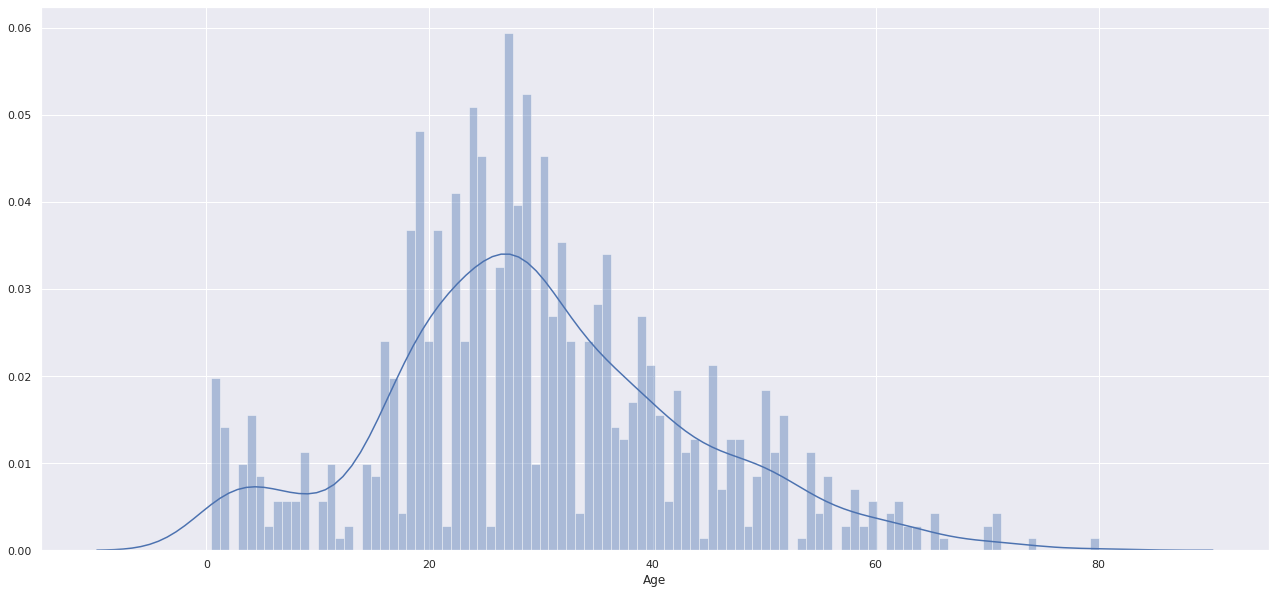

In [809]:
plt.subplots(figsize = (22,10),)
sns.distplot(train.Age, bins = 100, kde = True, rug = False, norm_hist=False);

age_group

In [0]:
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4:
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a


In [0]:
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

# train['age_group'] = pd.cut(train['Age'], bins=4, labels=groups)

In [0]:
train = pd.get_dummies(train, columns=['age_group'], drop_first=True)
test = pd.get_dummies(test, columns=['age_group'], drop_first=True)

In [0]:
# pd.get_dummies(train, columns=['age_group'], drop_first=True) #age_group_Young_Adult 필드 삭제

In [0]:
# pd.get_dummies(train, columns=['age_group'], drop_first=False)

In [815]:
train.shape

(888, 46)

In [816]:
test.shape

(418, 45)

사전 모델링 작업

In [0]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [0]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

Feature Scaling

In [819]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
370,1,25.000000,1,1,0,0,27.72085,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
269,1,35.000000,0,0,0,1,135.63330,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
718,0,33.116402,1,0,0,1,15.50000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
277,0,28.666263,1,0,0,1,0.00000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
612,1,18.881246,0,1,0,0,7.75000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [820]:
train[['Age', 'calculated_fare']].sample(5)

,Age,calculated_fare
606,30.0,7.8958
74,32.0,56.4958
24,8.0,4.2150
57,28.5,7.2292
72,21.0,73.5000


* MinMaxScaler - 최대값과 최소값을 사용하여 데이터의 크기를 조정하여 0과 1사이로 맞춤
* StandardScaler - 평균이 0이고 분산이 1이 되도록 데이터의 크기를 조정.
* RobustScaler - 데이터를 표준 스케일러와 유사하게 스케일링하지만 중간 값과 스케일링을 사용하여 중간 값과 스케일을 사용하여 큰 특이치의 문제를 해결.

In [821]:
# Before Scaling
headers = X_train.columns
X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.5000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
187,45.000000,1,0,0,1,26.5500,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
849,41.625333,0,1,0,0,44.5521,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
433,17.000000,1,0,0,1,7.1250,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
651,18.000000,0,0,1,0,11.5000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [822]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 170 to 686
Data columns (total 45 columns):
Age                         594 non-null float64
Sex                         594 non-null int64
SibSp                       594 non-null int64
Parch                       594 non-null int64
is_alone                    594 non-null int64
calculated_fare             594 non-null float64
title_ Master               594 non-null uint8
title_ Miss                 594 non-null uint8
title_ Mr                   594 non-null uint8
title_ Mrs                  594 non-null uint8
title_ rare                 594 non-null uint8
Pclass_1                    594 non-null uint8
Pclass_2                    594 non-null uint8
Pclass_3                    594 non-null uint8
Cabin_A                     594 non-null uint8
Cabin_B                     594 non-null uint8
Cabin_C                     594 non-null uint8
Cabin_D                     594 non-null uint8
Cabin_E                     594 non-null ui

In [823]:
headers

Index(['Age', 'Sex', 'SibSp', 'Parch', 'is_alone', 'calculated_fare',
       'title_ Master', 'title_ Miss', 'title_ Mr', 'title_ Mrs',
       'title_ rare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'nLength_group_good',
       'nLength_group_long', 'nLength_group_medium', 'nLength_group_short',
       'family_group_large', 'family_group_loner', 'family_group_small',
       'fare_group_Very_low', 'fare_group_high', 'fare_group_low',
       'fare_group_mid', 'fare_group_very_high', 'age_group_adult',
       'age_group_child', 'age_group_infant', 'age_group_middle_aged',
       'age_group_old', 'age_group_senior_citizen', 'age_group_teenager',
       'age_group_toddler'],
      dtype='object')

In [824]:
headers[0]

'Age'

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

test = sc.transform(test)

In [826]:
X_train

array([[ 2.26,  0.73, -0.46, ...,  5.22, -0.29, -0.2 ],
       [ 1.12,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [ 0.88, -1.38,  0.36, ..., -0.19, -0.29, -0.2 ],
       ...,
       [ 3.61,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [ 0.19,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [-1.1 ,  0.73,  2.82, ..., -0.19,  3.49, -0.2 ]])

In [827]:
# After Scaling
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,title_ rare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,nLength_group_good,nLength_group_long,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.258715,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,-0.143592,1.775907,-0.516260,-1.102913,-0.21395,4.190764,-0.344447,-0.181779,-0.205196,-0.430847,-1.0,-0.268705,-0.471405,-0.309743,0.607177,-0.325799,-0.250224,0.873276,-0.620174,-0.30317,0.794901,-0.659380,-0.186663,2.209341,-1.084354,-0.455321,-0.30317,-0.449921,-0.246403,-0.116841,-0.309743,-0.101015,5.223573,-0.286299,-0.200699
1,1.116854,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,-0.143592,1.775907,-0.516260,-1.102913,-0.21395,-0.238620,-0.344447,-0.181779,-0.205196,2.321012,-1.0,-0.268705,-0.471405,-0.309743,0.607177,3.069373,-0.250224,-1.145113,-0.620174,-0.30317,0.794901,-0.659380,-0.186663,2.209341,-1.084354,-0.455321,-0.30317,2.222611,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.200699
2,0.876016,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,-0.143592,1.775907,-0.516260,-1.102913,-0.21395,-0.238620,2.903200,-0.181779,-0.205196,-0.430847,-1.0,-0.268705,2.121320,-0.309743,-1.646967,3.069373,-0.250224,-1.145113,-0.620174,-0.30317,-1.258018,1.516575,-0.186663,2.209341,-1.084354,-0.455321,-0.30317,2.222611,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,-0.286299,-0.200699
3,-0.881404,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,-0.143592,-0.563093,-0.516260,0.906690,-0.21395,-0.238620,-0.344447,-0.181779,-0.205196,-0.430847,1.0,-0.268705,-0.471405,-0.309743,0.607177,-0.325799,-0.250224,0.873276,-0.620174,-0.30317,0.794901,-0.659380,-0.186663,-0.452624,0.922208,-0.455321,-0.30317,-0.449921,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.200699
4,-0.810038,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,-0.143592,-0.563093,1.937008,-1.102913,-0.21395,-0.238620,-0.344447,-0.181779,-0.205196,2.321012,-1.0,-0.268705,-0.471405,-0.309743,0.607177,-0.325799,-0.250224,-1.145113,1.612452,-0.30317,-1.258018,1.516575,-0.186663,-0.452624,-1.084354,2.196253,-0.30317,-0.449921,-0.246403,-0.116841,-0.309743,-0.101015,-0.191440,3.492850,-0.200699


Modeling the Data

In [0]:
train.calculated_fare = train.calculated_fare.astype(float)

In [829]:
train.calculated_fare.head()

0     3.62500
1    35.64165
2     7.92500
3    26.55000
4     8.05000
Name: calculated_fare, dtype: float64

Text(0, 0.5, 'Survival Status')

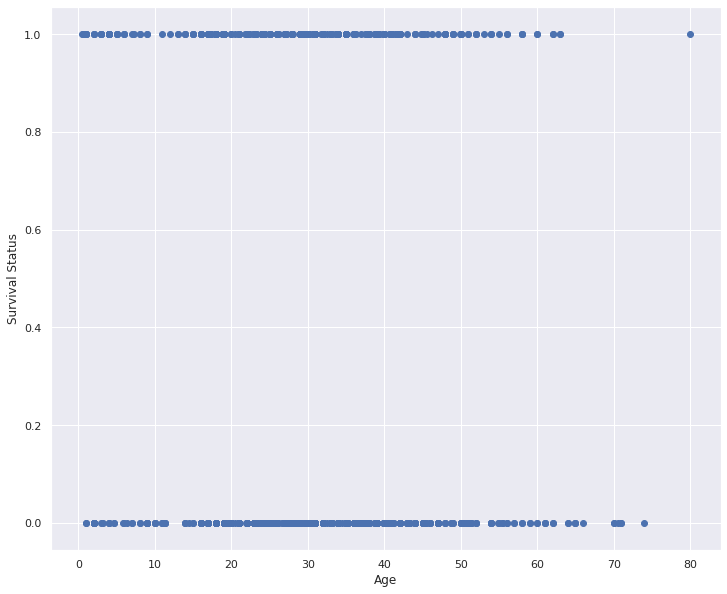

In [830]:
plt.subplots(figsize=(12,10))
plt.scatter(train.Age, train.Survived)
plt.xlabel("Age")
plt.ylabel("Survival Status")

In [831]:
type(X_train)

numpy.ndarray

In [832]:
type(y_train)

pandas.core.series.Series

In [833]:
type(X_test)

numpy.ndarray

In [834]:
type(y_test)

pandas.core.series.Series

In [835]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

logreg = LogisticRegression(solver='liblinear', penalty='l1',)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test), 4)))

So, Our accuracy Score is: 0.8027


In [836]:
# 기울기 파라미터(w)는 가중치weight 또는 계수coefficient라고 하며 lr 객체의 coef_ 속성에 저장되어 있고 편향offset 또는 절편intercept 파라미터(b)는 intercept
logreg.coef_

array([[-7.48e-02, -1.20e+00, -2.86e-01,  0.00e+00,  3.95e-05, -9.80e-02,
         6.89e-01,  0.00e+00, -3.45e-01,  3.21e-01,  0.00e+00,  2.41e-01,
         0.00e+00, -3.50e-01, -7.67e-03,  2.19e-01,  2.35e-01,  1.69e-01,
         1.96e-01,  0.00e+00, -2.14e-01,  0.00e+00,  0.00e+00,  7.01e-02,
        -2.64e-01,  0.00e+00,  4.21e-02, -1.29e-01,  0.00e+00, -6.11e-01,
         1.69e-01,  0.00e+00, -4.18e-03,  3.06e-01, -3.72e-02,  0.00e+00,
         0.00e+00, -4.54e-01, -6.96e-02,  7.58e-02, -3.14e-01, -1.35e-01,
        -4.53e-01, -1.58e-01,  0.00e+00]])

Evaluating the model

* 프로젝트 중 가장 중요한 기능은 Relative Feature Importance
* 프로젝트 성공에 가장 큰 영향을 미치는 기능은 Permutation Importance
* 이러한 기능의 변화는 프로젝트 성공에 어떤 영향을 미칠까? Partial Dependence
* 모델이 내린 결정에 대해 더 확인하자. SHAP values

In [0]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    
    cm = confusion_matrix(y_true, y_pred)
    print('cm', cm.shape)
    print('cm.newaxis', cm.sum(axis=1)[:, np.newaxis])
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
    
    fig.tight_layout()
    return ax

cm (2, 2)
cm.newaxis [[177]
 [117]]
Confusion matrix, without normalization
cm (2, 2)
cm.newaxis [[177]
 [117]]
Normalized confusion matrix


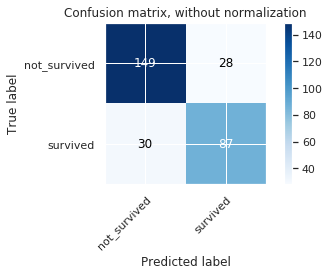

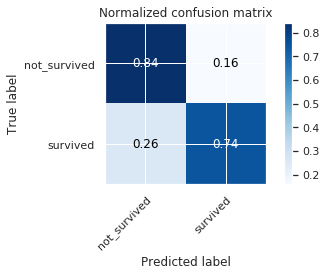

In [838]:
# TP | FN
# FP | TN
np.set_printoptions(precision=2)
class_names = np.array(['not_survived', 'survived'])

plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

* Precision = TP / TP + FP (1에 가까울수록 좋음)
* Recall = TP / TP + FN (1에 가까울수록 좋음)
* Accuracy = TP + TN / TP + TN + FP + FN (1에 가까울수록 좋음)

In [839]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       177
           1       0.76      0.74      0.75       117

    accuracy                           0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294



* Under-fitting : 그냥 대충 맞게 선 그어놓은 것 같은 거라 생각하면 됨.
* Appropriate-fitting : 신경써서 맞도록 그어놓은 것 같음. 적합이라 생각하면 됨.
* Over-fitting : 너무 잘 맞게 맞춰 그어놓은 거라 생각하면 됨.

언더피팅이란 모형이 데이터의 중요한 측면을 포착하지 못하여 더 많은 편견을 도입하고 성능을 저하시킬 때 발생한다. 반면 오버피팅은 훈련 데이터에서 모델이 너무 잘 수행되지만 유효성 검사 세트나 시험 세트에서는 잘 하지 못하는 경우다. 이 상황은 또한 편견이 적지만 변동이 더 많고 성능이 나쁜 것으로 알려져 있다. 이상적으로는 교육 데이터뿐 아니라 시험 데이터에서도 우수한 성능을 발휘하는 모델을 구성하고자 한다. 이것이 편견과 분산 트레이드오프다. 우리가 편견이 적고 분산이 더 많다는 뜻의 초과적응 모델을 가지고 있을 때, 우리는 분산이 훨씬 적은 대신 약간의 편견을 도입한다. 이 과제에 대한 한 가지 특별한 전술은 정규화 모델(Ridge, Lasso, Elastic Net)이다. 이 모델들은 편향-분산 트레이드오프를 다루기 위해 만들어졌다.

over-fitting을 다루는 방법
* 더 적은 매개 변수를 사용하여 모델을 단순화시킨다.
* 하이퍼 파라미터를 변경하여 모델을 단순화시킨다.
* 정규화 모델 도입
* 더 많은 훈련데이터를 사용한다.
* 더 많은 데이터를 제공하고 더 나은 품질의 데이터를 수집한다.

AUC & ROC Curve

0.8359650393548699


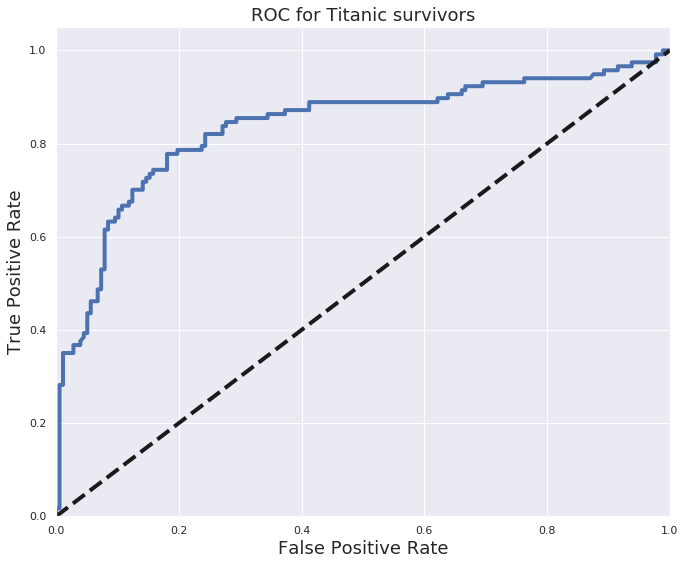

In [840]:
from sklearn.metrics import roc_curve, auc
# plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print(ROC_AUC)

plt.figure(figsize=[11, 9])
plt.plot(FPR, TPR, label='ROC curve (area=%0.2f)'%ROC_AUC, linewidth=4)
plt.plot([0,1], [0,1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Titanic survivors', fontsize=18)
plt.show()

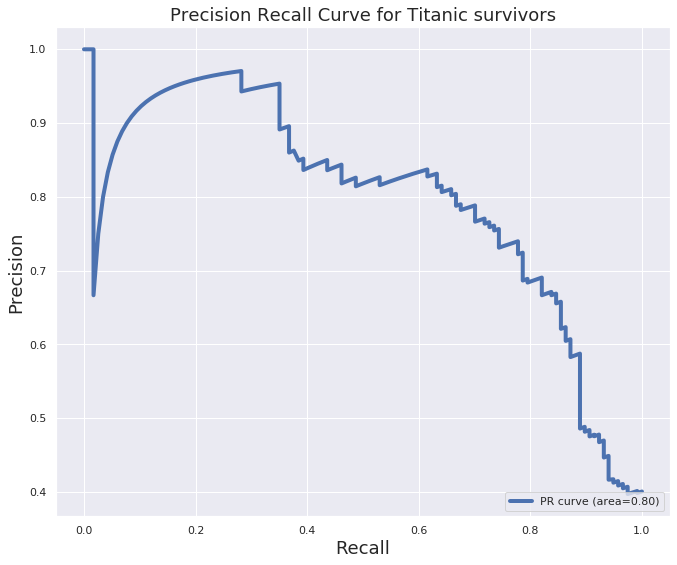

In [841]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11, 9])
plt.plot(recall, precision, label='PR curve (area=%0.2f)'%PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc='lower right')
plt.show()

Using Cross-validation
* 분산을 줄이는데 도움이 됨.
* 모델 예측성을 확장.

In [842]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=0)

column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=cv)
print("Cross-Validation accuracy scores: {}".format(accuracies))
print("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(), 5)))

Cross-Validation accuracy scores: [0.82 0.85 0.81 0.85 0.83 0.82 0.8  0.86 0.82 0.82]
Mean Cross-Validation accuracy score: 0.82748


로지스틱 회귀분석에 대한 그리드서치

그리드서치는 간단한 개념이지만 머신러닝에서 효과적인 기술임.
그리드서치라는 말은 우리가 그리드를 통해 최적의 매개변수/변수를 찾고 있다는 말을 의미한다.
이러한 최적 파라미터는 하이퍼 파라미터로도 일컬는다.
Hyperparameter는 모형을 적합시키고 모형의 동작을 결정하기 전에 설정된 모델 매개변수이다.
예를 들어, 우리가 선형 회귀법을 사용하기로 선택했을 때, 우리는 Ridge나 Rasso와 같은 손실 함수에 패널치를 추가하기로 결정할 수 있다. 이러한 벌칙은 사전에 설정하기 위해 특정 알파(정규화 기법의 강도)를 요구한다. 알파값이 높을수록 페널치가 더해지고 있다. 
GridSearch는 우리가 제공하는 값의 범위 중에서 알파값이 최적인 것을 찾아낸 다음, 그 최적의 값을 모델결과와 다르다는 것을 이해하는 것이 필수적이다.
예를 들어 정확도 점수 또는 평균 제곱오차와 같은 모델 평가 지표는 모델 결과로서 하이퍼 파라미터와 다르다.

In [843]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

C_vals = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5, 17, 17.5, 18]

penalties = ['l1', 'l2']

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25)
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=param,
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=cv)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['

In [844]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.822072072072072
{'C': 0.5, 'penalty': 'l2'}
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [845]:
logreg_grid = grid.best_estimator_
logreg_grid.score(X, y)

0.838963963963964

In [897]:
y_pred = logreg_grid.predict(X_test)
logreg_accy = round(accuracy_score(y_pred, y_test), 3)
print(logreg_accy)

0.816


K-Nearest Neighbor classifier(KNN)

In [846]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski', p=2)

cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation accuracy scores:{}".format(accuracies))
print("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(), 3)))

Cross-Validation accuracy scores:[0.82 0.8  0.79 0.81 0.82 0.81 0.8  0.79 0.77 0.82]
Mean Cross-Validation accuracy score: 0.802


KNN에 가장 적합한 k값을 찾아보자

In [847]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.750900900900901, 0.777927927927928, 0.7936936936936936, 0.7878378378378377, 0.8018018018018018, 0.8004504504504505, 0.7981981981981981, 0.7936936936936937, 0.8018018018018018, 0.7923423423423424, 0.7981981981981983, 0.7909909909909911, 0.7963963963963964, 0.7923423423423422, 0.8013513513513513, 0.7846846846846847, 0.7891891891891892, 0.7788288288288289, 0.7891891891891892, 0.7810810810810811, 0.7864864864864864, 0.7765765765765766, 0.7851351351351352, 0.7725225225225225, 0.777927927927928, 0.7648648648648649, 0.7666666666666667, 0.7612612612612611, 0.763963963963964, 0.755855855855856]

Mean accuracy score: 0.7837387387387388


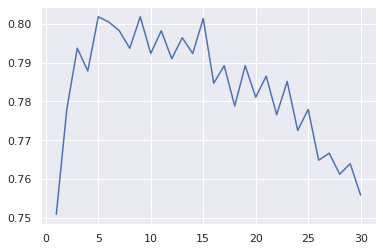

In [848]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

Grid search on KNN classifier

In [849]:
from sklearn.model_selection import GridSearchCV
k_range = range(1, 31)
weights_options = ['uniform', 'distance']

param = {'n_neighbors': k_range, 'weights': weights_options }

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

grid = GridSearchCV(KNeighborsClassifier(), param, cv=cv, verbose=False, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [850]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8059925093632959
{'n_neighbors': 7, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


KNN을 사용하여 그리드 검색에서 최상의 예상치를 사용해보자

In [851]:
knn_grid = grid.best_estimator_
knn_grid.score(X, y)

0.8524774774774775

In [895]:
y_pred = knn_grid.predict(X_test)
knn_accy = round(accuracy_score(y_pred, y_test), 3)
print(knn_accy)

0.837


다음으로 RandomizedSearchCV 사용해보자

In [852]:
from sklearn.model_selection import RandomizedSearchCV
k_range = range(1, 31)
weights_options = ['uniform', 'distance']

param = {'n_neighbors': k_range, 'weights': weights_options }
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)

grid = RandomizedSearchCV(KNeighborsClassifier(), param, cv=cv, verbose=0, n_jobs=-1, n_iter=40)
grid.fit(X, y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [853]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8059925093632959
{'weights': 'uniform', 'n_neighbors': 11}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


In [854]:
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X, y)

0.8400900900900901

Gaussian Naive Bayes

In [855]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.789


In [856]:
X_test

array([[-1.1 , -1.38, -0.46, ..., -0.19,  3.49, -0.2 ],
       [-0.32,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [ 1.55, -1.38,  0.36, ..., -0.19, -0.29, -0.2 ],
       ...,
       [ 0.76, -1.38, -0.46, ..., -0.19, -0.29, -0.2 ],
       [-0.03,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [ 1.4 ,  0.73,  0.36, ..., -0.19, -0.29, -0.2 ]])

In [857]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 888, dtype: int64

Support Vector Machines(SVM)

In [858]:
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10]
gammas = [0.0001, 0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma': gammas }
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=cv)
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [859]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8059925093632959
{'weights': 'uniform', 'n_neighbors': 11}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


In [860]:
svm_grid = grid_search.best_estimator_
svm_grid.score(X, y)

0.8265765765765766

In [893]:
y_pred = svm_grid.predict(X_test)
svc_accy = round(accuracy_score(y_pred, y_test), 3)
print(svc_accy)

0.803


Decision Tree Classifier

의사결정트리는 데이터 세트를 작은 하위 집합으로 분할하여 작동하는 원리임.
데이터 세트의 기능에 대한 질문을 통해 수행되며 필요한 질문을 적게 함으로써 라벨을 섞는 것임. 우리가 질문을 할 때, 우리는 데이터 세트를 더 많은 하위 세트로 나누고 있는 것임.
고유 유형의 레이블만 있는 부분군이 있으면 해당 노드에서 트리를 종료함.

In [861]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1, 30)
max_feature = [21, 22, 23, 24, 25, 26, 28, 29, 30, 'auto']
criterion = ['entropy', 'gini']

param = {'max_depth': max_depth,
         'max_features': max_feature,
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, verbose=0, cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True), n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
         

In [862]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 25}
0.8322979797979798
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [863]:
dectree_grid = grid.best_estimator_
dectree_grid.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [864]:
dectree_grid.score(X, y)

0.8592342342342343

In [865]:
y_pred = dectree_grid.predict(X_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)

0.823


In [866]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 888, dtype: int64

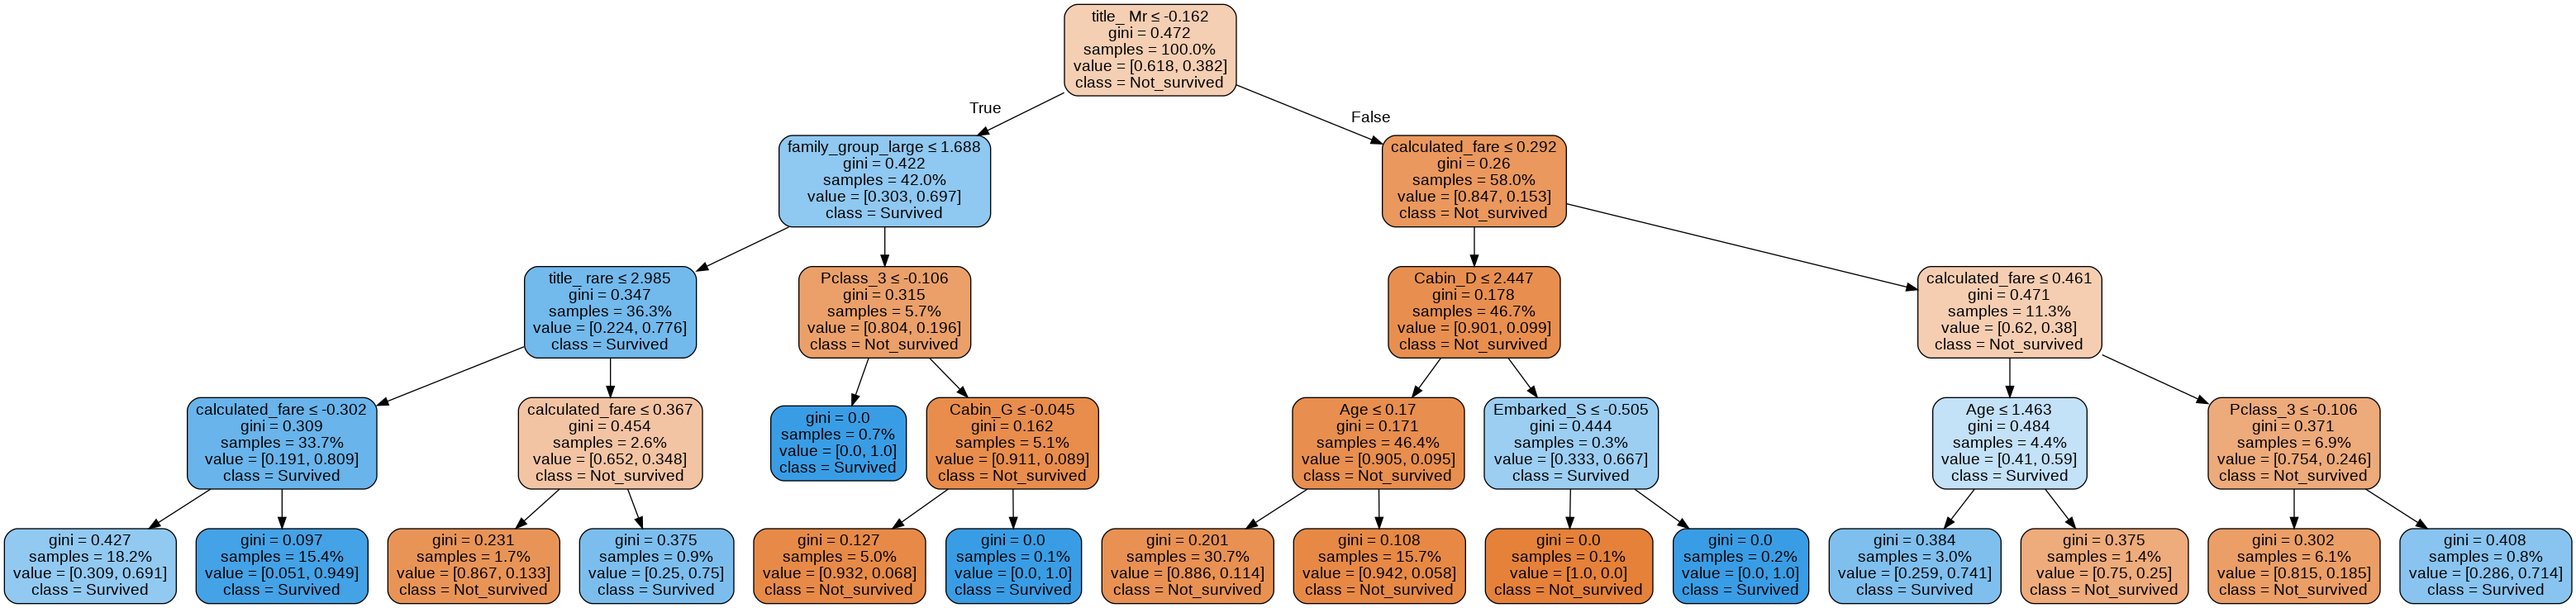

In [867]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()
export_graphviz(dectree_grid, out_file=dot_data, 
                feature_names=column_names, 
                class_names=(["Survived" if int(i) is 1 else "Not_survived" for i in y.unique()]), 
                filled=True, rounded=True, proportion=True, special_characters=True)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [868]:
feature_importances = pd.DataFrame(dectree_grid.feature_importances_, index=column_names, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_ Mr,0.579583
calculated_fare,0.145878
family_group_large,0.134406
Pclass_3,0.055564
title_ rare,0.041241
Age,0.020755
Cabin_D,0.008834
Cabin_G,0.007696
Embarked_S,0.006043
age_group_middle_aged,0.000000


Decision Tree가 결정한 상위 10가지 features는 타이타닉 승객의 운명을 분류하는데 도움이 됩니다.

Random Forest Classifier

In [869]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140, 145, 150, 155, 160]
max_depth = range(1, 10)
criterions = ['gini', 'entropy']
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'criterion': criterions}

grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'), 
                    param_grid=parameters,
                    cv=cv,
                    n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
      

In [870]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8430711610486892
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 160}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [871]:
rf_grid = grid.best_estimator_
rf_grid.score(X, y)

0.847972972972973

In [899]:
y_pred = rf_grid.predict(X_test)
random_accy = round(accuracy_score(y_pred, y_test), 3)
print(random_accy)

0.827


In [872]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       177
           1       0.78      0.78      0.78       117

    accuracy                           0.82       294
   macro avg       0.82      0.82      0.82       294
weighted avg       0.82      0.82      0.82       294



Feature Importance

In [873]:
feature_importances = pd.DataFrame(rf_grid.feature_importances_, index=column_names, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_ Mr,0.182906
Sex,0.179149
title_ Miss,0.075334
calculated_fare,0.068718
Pclass_3,0.064797
title_ Mrs,0.062604
Age,0.043001
family_group_small,0.032484
Cabin_G,0.031000
family_group_large,0.025171


Ensemble

Bagging Classifier (여러 개의 모델을 만들어 훈련하고 집계(평균)하는 방법)

배깅 분류기(Bagging Classifier, Bootstrap Aggregating)는 훈련 세트를 다시 샘플링하여 실행함으로써 조작하는 것을 수반하는 앙상블 방법이다. 간단한 리뷰를 해봅시다.

Bagging Classifier는 부트스트래핑된 데이터 집합이라는 프로세스를 사용하여 하나의 원본 데이터 집합에서 여러 데이터 집합을 생성하고 각각의 데이터 집합에서 알고리즘을 실행한다. 여기 부트스트래핑된 데이터 세트의 작동 방식을 보여주는 이미지가 있다.
원래 데이터 집합에서 부트스트래핑된 데이터 집합으로 다시 샘플링

부트스트래핑된 각 데이터 세트에서 학습 알고리즘을 실행한 후, 모든 모델은 평균을 취함으로써 결합된다. 시험 데이터/신규 데이터는 이 평균 분류기/결합 분류기를 거쳐 출력을 예측한다.

In [874]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10, 30, 50, 70, 80, 150, 160, 170, 175, 180, 185]
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators': n_estimators, }
grid = GridSearchCV(BaggingClassifier(base_estimator=None, bootstrap_features=False), param_grid=parameters, cv=cv, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [875]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8198501872659177
{'n_estimators': 30}
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=30,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [876]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X, y)

0.9864864864864865

In [901]:
y_pred = bagging_grid.predict(X_test)
bagging_accy = round(accuracy_score(y_pred, y_test), 3)
print(bagging_accy)

0.929


배깅은 강하고 복잡한 모델(예를 들어, 완전히 개발된 의사결정 나무)과 가장 잘 작동한다.

하지만, 그런 바보들이 여러분이 의사결정 나무와 비슷한 생각을 하도록 내버려 두지 마십시오. 자투리 또한 모델에 더 적합하다. 대신, 많은 샘플 교육 데이터가 반복되고 베이스 추정자를 만드는 데 사용되기 때문에 백킹은 오버핏을 감소시킨다. 똑같이 가능성이 높은 교육 데이터를 많이 사용할 경우, 백킹은 노이즈가 많은 데이터와의 오버핏에 매우 취약하지 않기 때문에 분산을 감소시킨다. 그러나, 단점은 이것이 편견의 증가를 이끈다는 것이다.

랜덤 포레스트 VS. 배깅 분류기

여러분 중 몇몇이 나와 같다면 랜덤 포레스트가 배깅 분류기와 비슷하다는 것을 발견할지도 모른다. 그러나 이 두 가지 사이에는 근본적인 차이가 있는데, 이것은 각 노드에서 기능의 하위 집합을 선택할 수 있는 랜덤 포레스트 능력이다.

AdaBoost Classifier(가중치를 주어 몇 가지로 분류하여 합치는 방법)

AdaBoost는 많은 "약한 학습자"(그들은 그루터기라고도 한다; 한 개의 노드와 두 개의 잎만 있는 나무)를 결합하여 분류한다.

이 베이스 모델 피팅은 각 그루터기가 차례로 사슬에 묶여 있어 병렬로 작동할 수 없는 반복 공정이다.

어떤 유세들은 다른 사람들보다 최종 분류에서 더 많은 발언권을 얻는다. 모델은 "중요도"를 나타내는 각 데이터 지점/원경에 할당된 가중치를 사용한다. 무게가 더 나가는 샘플은 다음 모델의 총 오차에 더 큰 영향을 미치고 더 많은 우선순위를 갖는다. 첫 번째 그루프는 균일하게 분포된 무게로 시작하는데, 이것은 처음에 모든 데이터 포스팅이 동일한 양의 가중치를 가졌다는 것을 의미한다.

각각의 그루터기는 이전의 그루터기의 실수를 감안하여 이야기함으로써 이루어진다. 각 반복 후 마지막 그루브의 오류/오류를 고려하기 위해 가중치를 다시 계산한다.

최종 예측은 일반적으로 각 기본 모델의 가중치가 훈련 오류 또는 오분류 비율에 따라 달라지는 가중 투표로 구성된다.

In [877]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100, 140, 145, 150, 160, 170, 175, 180, 185]
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1, 1, 0.01, 0.5]
parameters = {'n_estimators': n_estimators, 'learning_rate': learning_r }
grid = GridSearchCV(AdaBoostClassifier(base_estimator=None, ), param_grid=parameters, cv=cv, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 140, 145, 150, 160, 170, 175,
                                          180, 185]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [878]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8235955056179776
{'learning_rate': 0.1, 'n_estimators': 100}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


In [879]:
adaBoost_grid = grid.best_estimator_
adaBoost_grid.score(X, y)

0.8355855855855856

AdaBoost

장점

* 하이퍼파라미터가 올바르게 튜닝되었을 때 Bagging보다 높은 성능이 나옴.
* 분류와 회귀에 똑같이 잘 사용할 수 있음.
* 혼합 데이터 유형을 쉽게 처리
* 모델에 손실 기능을 사용할 수 있음.

단점

* 하이퍼파라미터의 적절한 튜닝이 어렵고 시간이 많이 소요됨.
* Bagging처럼 병렬화 할 수 없음.(대량의 데이터가 있을 경우 확장성이 힘듬)
* Bagging에 비해 오버피팅 위험이 높음

Gradient Boosting Classifier

In [880]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.864


XGBClassifier

In [881]:
X_test

array([[-1.1 , -1.38, -0.46, ..., -0.19,  3.49, -0.2 ],
       [-0.32,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [ 1.55, -1.38,  0.36, ..., -0.19, -0.29, -0.2 ],
       ...,
       [ 0.76, -1.38, -0.46, ..., -0.19, -0.29, -0.2 ],
       [-0.03,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [ 1.4 ,  0.73,  0.36, ..., -0.19, -0.29, -0.2 ]])

In [882]:
y_test

14     0
158    0
765    1
743    0
483    1
      ..
320    0
522    0
609    1
242    0
453    1
Name: Survived, Length: 294, dtype: int64

In [883]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(X_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
print(XGBClassifier_accy)

0.85


Extra Trees Classifier

In [884]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.966


Gaussian Process Classifier

In [885]:
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(X_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
print(gau_pro_accy)

0.925


Voting Classifier

In [0]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('lr_grid', logreg_grid),
    ('svc', svm_grid),
    ('random_forest', rf_grid),
    ('gradient_boosting', gradient_boost),
    ('decision_tree_grid', dectree_grid),
    ('knn_classifier', knn_grid),
    ('XGB_Classifier', XGBClassifier),
    ('bagging_classifier', bagging_grid),
    ('adaBoost_classifier', adaBoost_grid),
    ('ExtraTrees_Classifier', ExtraTreesClassifier),
    ('gaussian_classifier', gaussian),
    ('gaussian_process_classifier', GaussianProcessClassifier)
], voting='hard')

voting_classifier = voting_classifier.fit(X, y)

In [887]:
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.861


In [888]:
voting_classifier

VotingClassifier(estimators=[('lr_grid',
                              LogisticRegression(C=0.5, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=2, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0....
                             ('gaussian_classifier',
                              GaussianNB(priors=None, var

In [902]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'KNN', 
              'Logistic Regression',
              'Random Forest',
              'Naive Bayes',
              'Decision Tree',
              'Gradient Boosting Classifier',
              'Voting Classifier',
              'XGB Classifier',
              'ExtraTrees Classifier',
              'Bagging Classifier'],
    'Score': [svc_accy,
              knn_accy,
              logreg_accy,
              random_accy,
              gaussian_accy,
              dectree_accy,
              gradient_accy,
              voting_accy,
              XGBClassifier_accy,
              extraTree_accy,
              bagging_accy
              ]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,ExtraTrees Classifier,0.966
10,Bagging Classifier,0.929
6,Gradient Boosting Classifier,0.864
7,Voting Classifier,0.861
8,XGB Classifier,0.850
1,KNN,0.837
3,Random Forest,0.827
5,Decision Tree,0.823
2,Logistic Regression,0.816
0,Support Vector Machines,0.803


Submit test predictions

In [0]:
all_models = [logreg_grid,
              knn_grid,
              knn_ran_grid,
              svm_grid,
              dectree_grid,
              rf_grid,
              bagging_grid,
              adaBoost_grid,
              voting_classifier]

c = {}
for i in all_models:
    a = i.predict(X_test)
    b = accuracy_score(a, y_test)
    c[i] = b

In [904]:
c

{AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                    n_estimators=100, random_state=None): 0.8129251700680272,
 BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                   max_features=1.0, max_samples=1.0, n_estimators=30,
                   n_jobs=None, oob_score=False, random_state=None, verbose=0,
                   warm_start=False): 0.9285714285714286,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=4, max_features=25, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'): 0.8231292517006803,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric

In [911]:
c.values()

dict_values([0.8163265306122449, 0.8367346938775511, 0.8299319727891157, 0.8027210884353742, 0.8231292517006803, 0.826530612244898, 0.9285714285714286, 0.8129251700680272, 0.8605442176870748])

In [0]:
test_prediction = (max(c, key=c.get)).predict(test)
submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": test_prediction
})
submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

In [914]:
test

array([[ 0.37,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [ 1.26, -1.38,  0.36, ..., -0.19, -0.29, -0.2 ],
       [ 2.33,  0.73, -0.46, ...,  5.22, -0.29, -0.2 ],
       ...,
       [ 0.65,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [-0.43,  0.73, -0.46, ..., -0.19, -0.29, -0.2 ],
       [-1.59,  0.73,  0.36, ..., -0.19, -0.29, -0.2 ]])